# Week9/10_GGRC30 Assignment 4

## Objectives
Upon successful completion of this assignment students will be able to:
1.	Calculate multi-modal network accessibility
2.	Create a LAS Dataset
3.	Interrogate its statistics
5.	Make a DTM

## Grades
This assignment is out of 50 marks for questions are in (brackets).

## Due Date
This assignment is due on November 30 at 11:59PM on Quercus.


# Part1: Accessibility Analysis

While isochrones are great for telling us *how far* we can go in a certain travel time, what if we want to know *how much* of something we can reach on the network? This is where Accessibility Analysis comes in handy. This used to be a very time-consuming task to ask you to do: you would have to load your origin and destination locations, calculate an origin-destination cost matrix, join up the opportunity attributes of interest, multiply the travel times by some impedance function and weight the opportunities, summarize the results, and then join back to your input feature class. Bleh! Rather than do all that by hand, we can use a Python toolbox that automates many steps for calculating accessibility. Let's calculate accessibility to jobs using the tool:

1. Read the Paper  
There is an interactive version of Higgins's paper in the third Python notebook in this project. Take a look at it - it is short! But will be helpful as it gives you an overview of the concept and there is some code there to show you the impedance functions.

2. Download Toolbox  
Go to the [Accessibility Toolbox repository](https://github.com/higgicd/Accessibility_Toolbox) on my github. Click the green Code button and in the pulldown menu, click "Download Zip". Extract the toolbox in your Tutorial_4 working directory.

<img src="img/access_10.png" width="900" height="200">

3. Add Toolbox to your Project  
In the Catalog window, right-click on the Toolboxes and go to "Add Toolbox". Navigate to the folder you just extracted and add the `Accessibility_Calculator_Pro_MP` tool to your project:

<img src="img/access_11.png" width="400" height="200">

4. Open the Accessibility Calculator  
From Catalog, go into the `Accessibility_Calculator_Pro_MP` tool you added and select Accessibility Calculator > *Accessibility Calculator for Pro 2.4 Multiprocessing* and double-click to open it. From there, you can begin setting it up like so:


- the input network dataset is your `TransitNetwork_ND`
- Travel mode is `PublicTransit`
- use a 60-minute travel time cutoff
- set your departure time for December 30, 2019 at 8:00 AM
- pick the `MGAUS180` impedance function (see paper for what this means)

<img src="img/access_12.png" width="400" height="200">

Scroll down in the toolbox dialog to set up the Origins:

- add your origins as the DAs
- set the ID to the `DAUID_NUM` field
- keep a 5,000 metre search tolerance: this will snap DA centroids to the network if they are within 5km of a network element
- for Search Criteria, we only want our DA centroids to locate on the Streets. This makes sense - all journeys should start on the street and then go to transit. Snapping to a subway line or something would mess everything up
- we don't need a Search Query (would be helpful for setting up snapping to only a particular type of street or something)

<img src="img/access_13.png" width="400" height="200">

Keep going for the Destinations:

- add the TTS zones as the destinations
- use the `GTA06` zone code field as their ID
- we want to use `EmpTot2016` as the destination opportunities: this is a count of all employment in the zone in 2016
- set to snap to the Streets

<img src="img/access_14.png" width="400" height="200">

Finally, for the other settings:

- set your ouput work folder
- set an output geodatabase name
- set some batch size
    - the tool uses multiprocessing to complete, spreading the input origins over the number of cores on your PC according to these batches
    - if your PC does not have a lot of ram, you can make this lower, like say 100 origins per batch
- turn on the join output option
- click Run to run the tool!

<img src="img/access_15.png" width="400" height="200">

## Map and Interpret Results
The multiprocessing tool takes about 10 min to run on the GTFS network using my 8-core PC - this will no doubt be longer for the lab PCs.
**Note** - you can set multiple impedance functions in the tool (as you need to do for the question Part1), so you only have to run it once! The tool creates some work folders in your working directory to store the results from the multiprocessing. The output is then joined back to your input origins - in the table you will see the new field "SUM_Ai_MGAUS180" as well as a field called "FREQUENCY" that counts how many destinations each origin was connected to in the analysis.
After symbolizing the results, you should get a map that looks like this:

<img src="img/access_16.png" width="900" height="200">

## Accessibility Analysis (25 points)
For this task of the assignment, you also need to use the Accessibility Toolbox to create maps of accessibility to jobs using walking and transit in the City of Toronto. For answering following questions, you need to use the rapid transit network I provided. "TTC_RT_Network_ND" inisde the TTC_RT_Network geodatabase). 

Create two maps: one using a 45-minute cumulative rectangular impedance function and a second using the EXP0_12 negative exponential impedance function. (see the Interactive paper for what this means).

Use the paper and lecture material to help you interpet your results!

### Questions

1.	Prepare map layouts for both analysis with all elements as usual (North arrow, legend, and scale bar, map source, and map title). Attach the exported PDF of each map to your answer sheet.  (**10 marks**)

2.	In your own words, explain the concept of transportation accessibility (**2 marks**) and how you would interpret it given your maps. (**3 marks**)

3.	Compare the final result of two maps and discuss what is the role of the impedance function, and how has it affected your results across the cumulative and negative exponential functions? To help answer this, you can look at the descriptive statistics and a histogram plot of results for each function. (**10 marks**)

## Part 2: 3D City (25 points) 

Lidar data have become an important source for detailed 3D information for cities as well as forestry, agriculture, archaeology, and many other applications. Topographic lidar surveys, which are conducted by airplane, helicopter or drone, produce data sets that contain millions or billions of points. While this can create challenges for storing, visualizing and analyzing the data, we will utilize ArcGIS Pro to explore and analyze some LiDAR and its extensions to 3D GIS analysis.

Between April-May 2014, the City of Toronto conducted a LiDAR scan of the entire city using an aerial LiDAR service. This data is a huge resource for learning about 3D GIS! The data are available in a set of many tiles from the Map and Data Library at the UofT via this website: https://mdl.library.utoronto.ca/collections/geospatial-data/toronto-lidar-2015. The accompanying Python Notebook for this assignment downloads a set of LiDAR files for the City of Toronto: 6 tiles for Scarborough around UTSC campus and 6 more tiles for a part of downtown. Use the notebook code to get started.

For assignmnet 4, you need to wrok with Scarborough dataset and for tutorial 11, you need to use downtown dataset.


## Computing Power
Just a note on computing power – 3D GIS benefits greatly from powerful computers, particularly those with discrete graphics cards and lots of memory. You might find that your PC is struggling with this workflow. If so, utilize the GIS Lab PCs – they have decent hardware. You can further increase some of the 3D performance by going to your project options and changing the rendering quality to `Low (speed)`:

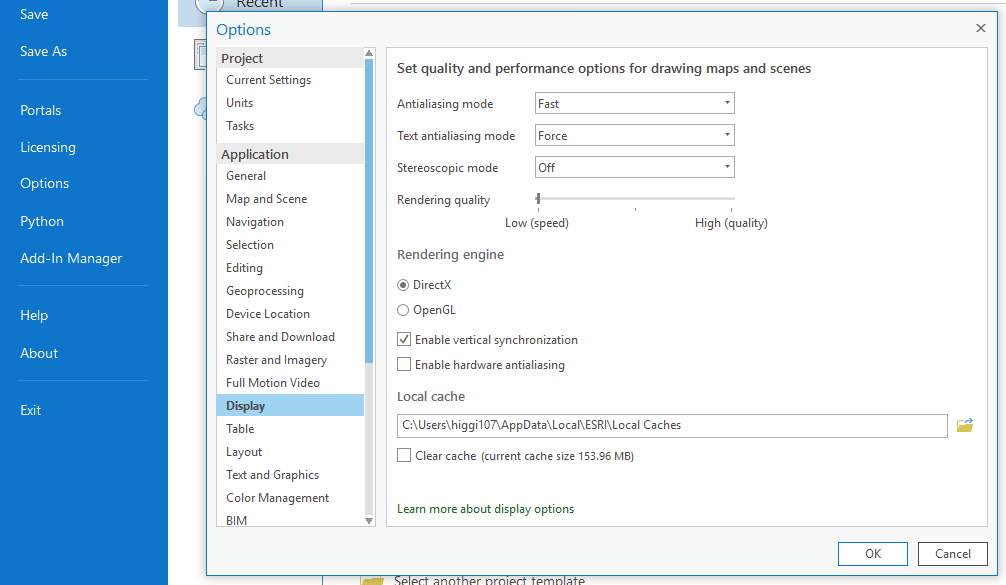

# Getting Data
Run the code below to get the LiDAR Tiles. First, set up our helper functions:

In [ ]:
# import packages
import os # for operating-system stuff like file paths
import arcpy # to run arcgis tools from python
import requests # to download files from the internet
import zipfile # to unzip files
import io # to write files to disk

# create a general downloader/unzipper function
def download_zip(url): # defines the function and parameters as function_name(parameters)
    package = requests.get(url) # uses 'get' from the requests package to get a file from a url
    zip_package = zipfile.ZipFile(io.BytesIO(package.content)) # this tells the ZipFile function that the content from our package is in zip format
    zip_package.extractall() # use extractall to unzip the contents of zip_package

# another helper function for downloading other file types like geojson
def download_file(url, file_name): 
    package = requests.get(url)
    with open(file_name, "wb") as file:
        file.write(package.content)
    
# get environment variables
work_dir = os.getcwd()

### Download the Data
**NOTE**: You have to be on the UofT network to do this download from the library, either through the UTOR VPN using your own PC, or using the lab PCs through remote desktop (or being on campus wifi in person). Otherwise, the data will not be downloaded.

- LiDAR data for the city of Toronto for 2015 from the Map and Data Library (all available [here](https://mdl.library.utoronto.ca/collections/geospatial-data/toronto-lidar-2015))
    - we will download a set of tiles: one for scarborough and, optionally, another for downtown
- other data are already in the geodatabase:
    - building footprints for scarborough and downtown

In [ ]:
# download lidar data for downtown
# create output folder
os.mkdir(os.path.join(work_dir, "las_downtown"))
las_downtown = os.path.join(work_dir, "las_downtown")

# list of tiles to download
las_list = ["6295_48330", "6300_48330", "6305_48330", "6295_48335", "6300_48335", "6305_48335"]

for file in las_list:
    download_file(url = "http://maps.library.utoronto.ca/dataut/Toronto/Lidar/AirborneImaging2014-15/WebData/"+file+".zip", 
                  file_name = file+".zip")
    # move to output folder
    os.rename(os.path.join(work_dir, file+".zip"), os.path.join(las_downtown, file+".zip"))
    
    # unzip to directory
    zip_package = zipfile.ZipFile(os.path.join(las_downtown, file+".zip"))
    zip_package.extractall(os.path.join(las_downtown, file))

In [ ]:
# download lidar data for scarborough
# create output folder
os.mkdir(os.path.join(work_dir, "las_scarborough"))
las_scarb = os.path.join(work_dir, "las_scarborough")

# list of tiles to download
las_list = ["6450_48490", "6455_48490", "6460_48490", "6450_48495", "6455_48495", "6460_48495"]

for file in las_list:
    download_file(url = "http://maps.library.utoronto.ca/dataut/Toronto/Lidar/AirborneImaging2014-15/WebData/"+file+".zip", 
                  file_name = file+".zip")
    # move to output folder
    os.rename(os.path.join(work_dir, file+".zip"), os.path.join(las_scarb, file+".zip"))
    
    # unzip to directory
    zip_package = zipfile.ZipFile(os.path.join(las_scarb, file+".zip"))
    zip_package.extractall(os.path.join(las_scarb, file))

They will be located in your project folder under `las_scarborough`. The six `.zip` files we downloaded for Scarborough should be about 267mb in size - check to see if there's any errors with not downloading the full data from the MDL.

## A: Create LAS Dataset
You now have a bunch of .las files in the scarborough and downtown folders that contain all the LiDAR points. The next step is to run the [Create LAS Dataset](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/create-las-dataset.htm) tool to create a las dataset for Scarborough. Make sure to set the tool up like this:
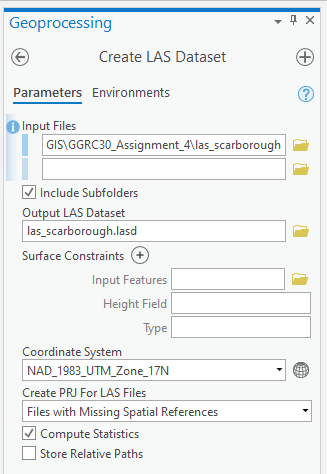  

- the folder for `las_scarborough` as the first set of input files
- turn on Include Subfolders so it gets the data for each tile
- give your output las dataset a name
- change the coordinate system to NAD 1983 Zone 17N
- turn on create `.prj` files for those without a spatial reference
- turn on compute statistics  

### Explore Data
In your Scene, you will now have the two LAS Datasets. You might have to zoom in to see them, but once there, they will each look something like this when zoomed out: 
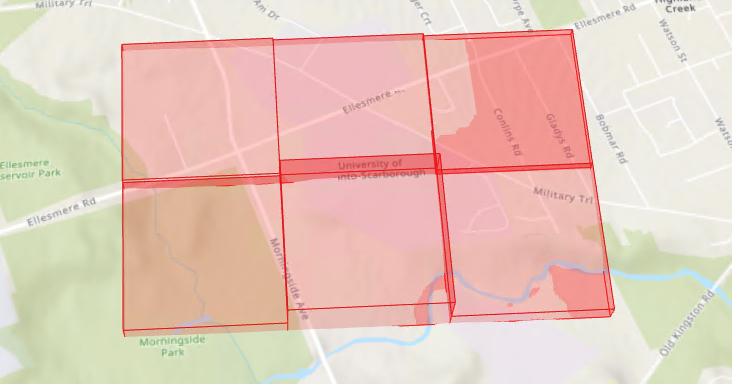

And when you zoom in, you can see the actual raw lidar points:  
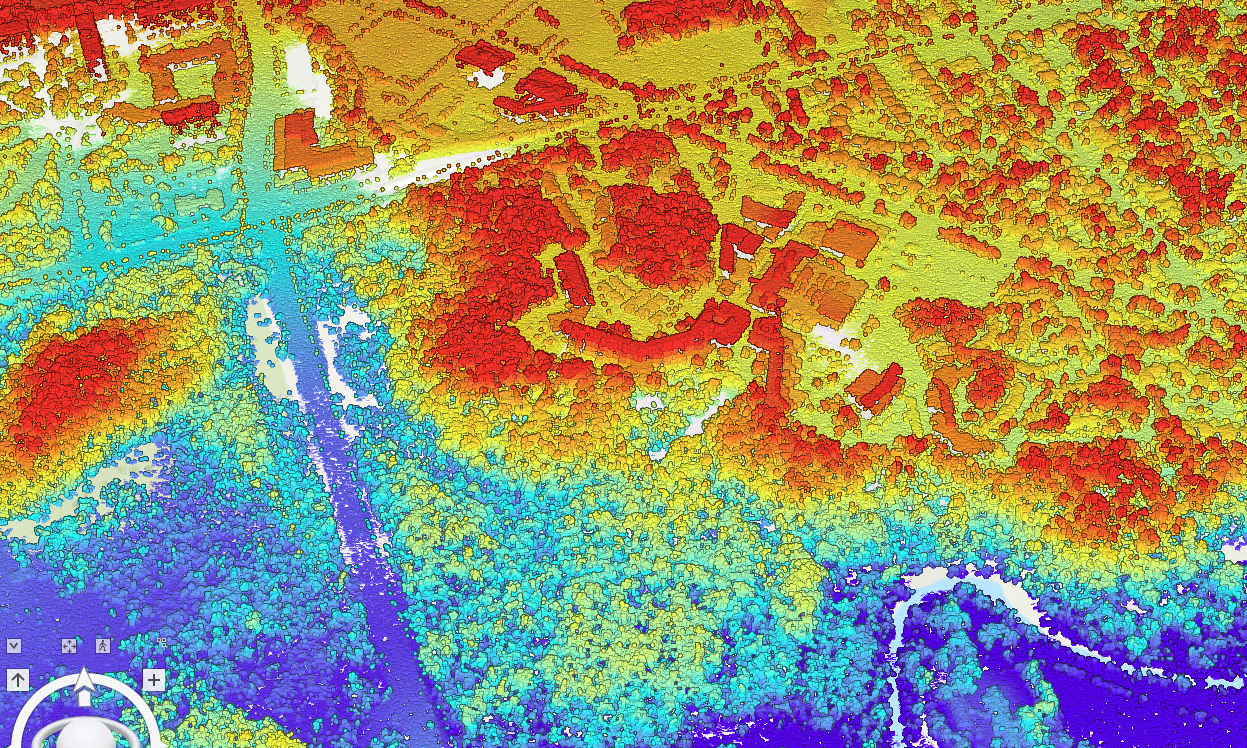

### Questions

1. What is the average point spacing / point density across the 6 files in the Scarborough data? (**1 marks**)

2. What is your interpretation in terms of point density in the Scarborough data? (**5 marks**)

3. What proportion of points are classified as ‘Ground’ and what proportion of them are classified as ‘Low Vegetation” in the Scarborough data? (**2 marks**)

4. Looking at the ‘Returns’ information, what proportion of the Scarborough LiDAR data is made up of ‘1st’, '2nd', '3rd' and '4th' returns? (**2 mark**)

5. Describe how LiDAR works in terms of generating pulse returns. (**5 marks**)

6. Suppose that you create LAS dataset for Downtown Toronto as well. Describe the expected difference between the number of returns in both Scarborough and Downtown data. (**2 marks**) What is your expectation in terms of association between the number of returns and the number of points? (**3 marks**)


## B: Create a DTM 
You can also use the ground classified points in the LiDAR data to create a raster digital terrain (ground) model. 

### Workflow:

- Filter out all non-ground points (can keep any returns)
- Run the [LAS Dataset to Raster](https://pro.arcgis.com/en/pro-app/latest/tool-reference/conversion/las-dataset-to-raster.htm) tool to create the surface raster. Set the tool up in the same way as the PDF tutorial, using average cell assignment, natural neighbour void filling, and a 5m cell size (in the environments tab). 

### Questions
1. What are the statistics of your output DTM raster for Scarborough (min, max, mean, std.dev.)? (**2 marks**)

2. What is the (conceptual) difference between the linear and natural neighbour void filling methods? (**3 marks**)